Test Kruskala-Wallisa 

scipy.stats.kruskal(*args, nan_policy='propagate', axis=0)[source]

Oblicz test H Kruskala-Wallisa dla niezależnych próbek.

Test H Kruskala-Wallisa test Kruskala-Wallisa porównuje każdą z obserwacji względem mediany (a mówiąc precyzyjniej (matematycznie) porównuje sumy rang a nie średnie lub wariancje); dlatego przy raportowaniu jego wyników warto zwrócić uwagę na wartość mediany we wszystkich grupach i na tej podstawie wyciągnąć wnioski, a nie porównując średnie.
 Jest to nieparametryczna wersja ANOVA. Test działa na 2 lub więcej niezależnych próbkach, które mogą mieć różne rozmiary. Zauważ, że odrzucenie hipotezy zerowej nie wskazuje, która z grup jest inna. Porównania post hoc między grupami są wymagane w celu określenia, które grupy są różne. 

Proszę sprawdzić czy wyniki testu zależą  od wieku (N - nastolatek, D - dzieci, M -
 młodzież)

In [22]:
import pandas as pd
df = pd.DataFrame({'score': [82,86,79,83,84,85,86,87,74,82,78,75,76,77,79,79,77,78,82,79],
                   'group': ['N','N','N','N','N','N','N','N','D','D','D','D','D','D','M','M','M','M','M','M']})
data = df
#Wyznaczenie grup
group1 = df[(df["group"] == 'N')]
group2 = df[(df["group"] == 'D')]
group3  = df[(df["group"] == 'M')]
#budowa wektora bez oznaczenia
group1=group1['score']
group2=group2['score']
group3=group3['score']

1. Niezależność zmiennych losowych w rozważanych populacjach (grupach).

Zakładamy, że grupy były rozdzielone wiek<10 todzieci do 13 lat to nastolatkowie, powyżej młodzież. Nie czekamy, aż osoby podrosną, tylko sprawdzamy różne grupy.

Założenie spelnione.

Prosze wykonac test Kruskala-Wallisa. 





In [23]:
from scipy import stats
#Kruskal-Wallis Test 
stats.kruskal(group1, group2, group3)

KruskalResult(statistic=12.630188499619193, pvalue=0.0018087952739571063)

TESTY POST - HOC (po fakcie)
jest to test post hoc dla wielokrotnych porównań średnich sum rang (test Dunna). Może być stosowany po jednokierunkowej analizie wariancji według rang Kruskala-Wallisa w celu przeprowadzenia porównań parami.

scikit_posthocs.posthoc_dunn(a: Union[list, numpy.ndarray, pandas.core.frame.DataFrame], val_col: str = None, group_col: str = None, p_adjust: str = None, sort: bool = True) → pandas.core.frame.DataFrame



In [24]:
import scikit_posthocs as sp
x = [group1, group2, group3]
sp.posthoc_dunn(x, p_adjust = 'holm')

,1,2,3
1,1.000000,0.001711,0.047137
2,0.001711,1.000000,0.269172
3,0.047137,0.269172,1.000000


Z wyników testu Dunna możemy zaobserwować:

Skorygowana wartość p dla różnicy między grupą 1 a grupą 2 wynosi 0,001711.

Skorygowana wartość p dla różnicy między grupą 1 a grupą 3 wynosi 0,047137.

Skorygowana wartość p dla różnicy między grupą 2 a grupą 3 wynosi 0,269172. 

In [25]:
from scipy import stats
#Kruskal-Wallis Test 
stats.kruskal(group1, group3)

KruskalResult(statistic=7.549097065462756, pvalue=0.0060040152037075)

Proszę wybrać test i porównać te dwie grupy, których mediany mają największe różnice.  Czy to się zgadza z testami post-hoc ?  
**NIE WOLNO PORÓNYWAĆ ZA POMOCĄ JEDNEGO TESTU NAJPIERW PIERWSZEJ GRUPY Z DRUGĄ, POTEM Z TRZECIĄ. DLACZEGO NIE WOLNO?**


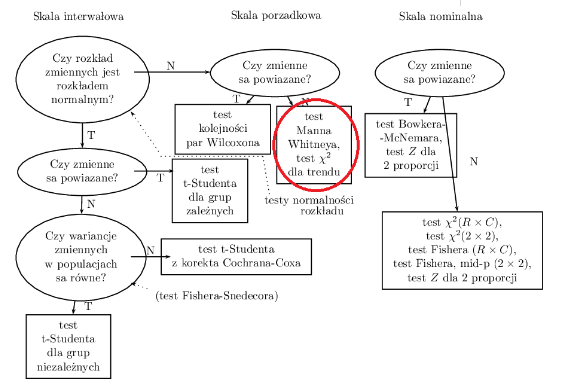 

Test U Manna-Whitneya na dwóch niezależnych próbach.

Test U Manna-Whitneya jest nieparametrycznym testem hipotezy zerowej, że rozkład leżący u podstaw próbki x jest taki sam, jak rozkład leżący u podstaw próbki y. Jest często używany jako test różnicy w lokalizacji między dystrybucjami. 

scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto', *, nan_policy='propagate')

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

Proszę wybrać test U Manna-Whitney i porównać wyniki testów nastolatków z dziećmi i  nastolatków z młodzieżą. Czy to się zgadza z testami post-hoc ? A jeśli nie to dlaczego ?  


In [26]:
#Mann-Whitney U Test 
res = stats.mannwhitneyu(group1, group3)
print(res)

MannwhitneyuResult(statistic=45.0, pvalue=0.007315199056506598)
